In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Problem 2

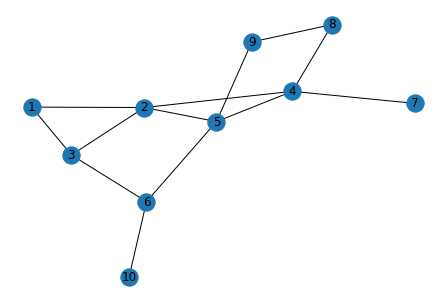

In [2]:
G = nx.Graph()
G.add_nodes_from([(i+1, {"weight": 0.5}) for i in range(10)])
G.add_edges_from([(1, 2), (1, 3), (2, 3), (2,4), (2,5), (3,6), (4, 5), (4, 7), (4, 8), (5, 6), (5, 9), (6, 10), (8, 9)])
G.nodes[5]["weight"] = 0
G.nodes[6]["weight"] = 1
G.nodes[7]["weight"] = 1
G.nodes[10]["weight"] = 1

nx.draw(G, with_labels = True)

In [3]:
for node in G.nodes():
    print(node, G.nodes[node]["weight"])

1 0.5
2 0.5
3 0.5
4 0.5
5 0
6 1
7 1
8 0.5
9 0.5
10 1


In [4]:
for i in range(2):
    number = [0 for _ in range(len(G.nodes()))]
    counter_ = 0
    for node in G.nodes():
        if G.nodes[node]["weight"] == 0 or G.nodes[node]["weight"] == 1:
            number[counter_] = G.nodes[node]["weight"]
            counter_ += 1
            continue
        prob = 0
        counter = 0
        for neigh in G.neighbors(node):
            counter += 1
            prob += G.nodes[neigh]["weight"]
        number[counter_] = prob/counter
        counter_ += 1
    counter_ = 0
    for node in G.nodes():
        G.nodes[node]["weight"] = number[counter_]
        counter_ += 1
for node in G.nodes():
    print(node, G.nodes[node]["weight"])    

1 0.5208333333333333
2 0.41666666666666663
3 0.625
4 0.46875
5 0
6 1
7 1
8 0.375
9 0.25
10 1


In [5]:
for node in G.neighbors(1):
    print(node)

2
3


# Problem 3

1 node with wordV 010
2 node with wordV 111
3 node with wordV 101
4 node with wordV 101
5 node with wordV 101
6 node with wordV 010
7 node with wordV 001


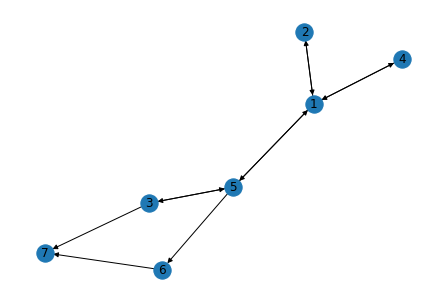

In [42]:
WordV = ["010", "111", "101", "101", "101", "010", "001"]
G1 = nx.DiGraph()
G1.add_nodes_from([(i+1, {"WordV": "111", "Label": 0, "LinkV":[0,0]}) for i in range(7)])
G1.add_edges_from([(1, 2), (1,4), (1,5), (2,1), (3,5), (3, 7), (4,1), (5,1), (5,3), (5,6), (6,7)])
for node in G1.nodes():
    G1.nodes[node]["WordV"] = WordV[node-1];
    print(f"{node} node with wordV {WordV[node-1]}")

nx.draw(G1, with_labels = True)

## 3.1 Bootstrap Phase

Assign initial label by applying classifiere f 


In [43]:
f = {"001":0, "010":0, "101":1, "111":1}
for node in G1.nodes():
    G1.nodes[node]["Label"] = f[G1.nodes[node]["WordV"]]
    print(node, " node with Label", f[G1.nodes[node]["WordV"]])

1  node with Label 0
2  node with Label 1
3  node with Label 1
4  node with Label 1
5  node with Label 1
6  node with Label 0
7  node with Label 0


## 3.2 Iteration 1

update LinkV

In [44]:
for src, dst in G1.out_edges():
    if G1.nodes[src]["Label"] == 1:
        G1.nodes[dst]["LinkV"][0] = 1
    if G1.nodes[src]["Label"] == 0:
        G1.nodes[dst]["LinkV"][1] = 1
for node in G1.nodes():
    print(node, " node with LinkV ", G1.nodes[node]["LinkV"])

1  node with LinkV  [1, 0]
2  node with LinkV  [0, 1]
3  node with LinkV  [1, 0]
4  node with LinkV  [0, 1]
5  node with LinkV  [1, 1]
6  node with LinkV  [1, 0]
7  node with LinkV  [1, 1]


assign new label for each nodes

In [45]:
def g(LinkV, WordV):
    if LinkV[0] == 1 or WordV == "010":
        return 0
    else:
        return 1

In [46]:
for node in G1.nodes():
    G1.nodes[node]["Label"] = g(G1.nodes[node]["LinkV"], G1.nodes[node]["WordV"])
    print(node, " node with LinkV ", G1.nodes[node]["Label"])

1  node with LinkV  0
2  node with LinkV  1
3  node with LinkV  0
4  node with LinkV  1
5  node with LinkV  0
6  node with LinkV  0
7  node with LinkV  0


## 3.3 Interation2

In [47]:
for src, dst in G1.out_edges():
    if G1.nodes[src]["Label"] == 1:
        G1.nodes[dst]["LinkV"][0] = 1
    if G1.nodes[src]["Label"] == 0:
        G1.nodes[dst]["LinkV"][1] = 1
for node in G1.nodes():
    G1.nodes[node]["Label"] = g(G1.nodes[node]["LinkV"], G1.nodes[node]["WordV"])
    print(node, " node with LinkV ", G1.nodes[node]["Label"], "   LinkV", G1.nodes[node]["LinkV"])

1  node with LinkV  0    LinkV [1, 1]
2  node with LinkV  1    LinkV [0, 1]
3  node with LinkV  0    LinkV [1, 1]
4  node with LinkV  1    LinkV [0, 1]
5  node with LinkV  0    LinkV [1, 1]
6  node with LinkV  0    LinkV [1, 1]
7  node with LinkV  0    LinkV [1, 1]


## 3.4 Convergence

Execture extra iteration to check the stagnation phase was reached 

Answer is YEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEES

In [48]:
for src, dst in G1.out_edges():
    if G1.nodes[src]["Label"] == 1:
        G1.nodes[dst]["LinkV"][0] = 1
    if G1.nodes[src]["Label"] == 0:
        G1.nodes[dst]["LinkV"][1] = 1
for node in G1.nodes():
    G1.nodes[node]["Label"] = g(G1.nodes[node]["LinkV"], G1.nodes[node]["WordV"])
    print(node, " node with LinkV ", G1.nodes[node]["Label"], "   LinkV", G1.nodes[node]["LinkV"])

1  node with LinkV  0    LinkV [1, 1]
2  node with LinkV  1    LinkV [0, 1]
3  node with LinkV  0    LinkV [1, 1]
4  node with LinkV  1    LinkV [0, 1]
5  node with LinkV  0    LinkV [1, 1]
6  node with LinkV  0    LinkV [1, 1]
7  node with LinkV  0    LinkV [1, 1]


# 4. FNN Expressiveness